# UK Roads

Load in a HUGE file of all roads. Simplify it to just the major ones.

## Code setup

In [144]:
import os
import geopandas as gpd
import io
import fiona
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load roads data

In [3]:
path_to_roads

'../data_geojson/ordnance_survey/oproad_essh_gb.zip'

In [2]:
path_to_roads = os.path.join('..', 'data_geojson', 'ordnance_survey', 'oproad_essh_gb.zip')
zipshp = io.BytesIO(open(path_to_roads, 'rb').read())

with fiona.BytesCollection(zipshp.read()) as src:
    crs = src.crs
    gdf_roads = gpd.GeoDataFrame.from_features(src, crs=crs)

ERROR 4: `/vsizip//vsimem/b4e5c4a976114844b1a49a4cff233c63.zip' not recognized as a supported file format.


DriverError: '/vsizip//vsimem/b4e5c4a976114844b1a49a4cff233c63.zip' not recognized as a supported file format.

In [ ]:
gdf_roads.head()

## Inspect one grid block

In [5]:
path_to_block = os.path.join('..', 'data_geojson', 'ordnance_survey', 'oproad_essh_gb', 'data', 'HP_RoadLink.shp')

gdf_block = gpd.read_file(path_to_block)

In [10]:
gdf_block.head().T

,0,1,2,3,4
fictitious,false,false,false,false,false
identifier,891C021C-EC0E-46FF-8663-E67DC3D28957,6231DEF6-E614-400F-B004-0220673DDB84,E749D419-1811-4814-89A1-E13F37A6D71E,79ECBC81-82BC-4C8F-89D9-3B9211262292,2AE7328C-DF88-4EF5-BEC7-857CCF2AD8F0
class,Unknown,Unclassified,Unknown,Unclassified,Unclassified
roadNumber,NaN,NaN,NaN,NaN,NaN
name1,NaN,NaN,NaN,NaN,NaN
name1_lang,NaN,NaN,NaN,NaN,NaN
name2,NaN,NaN,NaN,NaN,NaN
name2_lang,NaN,NaN,NaN,NaN,NaN
formOfWay,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway
length,625,225,69,49,312


In [7]:
gdf_block.columns

Index(['fictitious', 'identifier', 'class', 'roadNumber', 'name1',
       'name1_lang', 'name2', 'name2_lang', 'formOfWay', 'length', 'primary',
       'trunkRoad', 'loop', 'startNode', 'endNode', 'structure', 'nameTOID',
       'numberTOID', 'function', 'geometry'],
      dtype='object')

In [8]:
len(gdf_block)

361

In [9]:
gdf_block[gdf_block['primary'] == True]

,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,length,primary,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,geometry


In [11]:
sorted(list(set(gdf_block['function'])))

['A Road',
 'B Road',
 'Local Access Road',
 'Local Road',
 'Minor Road',
 'Restricted Local Access Road']

In [12]:
road_types_to_keep = [
    'A Road'
]

In [14]:
gdf_block[gdf_block['function'].isin(road_types_to_keep)].T

,111,114,121,123,127,130,132,134,136,157,...,184,241,243,257,258,269,273,274,334,335
fictitious,false,false,false,false,false,false,false,false,false,false,...,false,false,false,false,false,false,false,false,false,false
identifier,D1D2CA21-407F-4097-8826-AF632863F44D,79F67641-D19C-4CF8-A6F0-535CDC58C9A4,B2288CDD-BD20-4CCD-9E6B-93A453CD9672,1ACD0696-0975-48C5-A19C-2F3B107B4AF8,015EDFE6-A3A3-4D26-AAB1-32B1DEE5D275,EF77D5EF-6667-47CB-B228-CBBD10B3763D,A659C234-D5F1-44B3-BFE2-DAD545F8BA15,D7C58FE2-1913-419E-8F39-314178B9197F,9BC24F19-5A71-47C0-B8A3-C6A2482BD6A9,A706797F-5039-4DD6-BC68-0E2D2BB59347,...,EB804666-E434-4A33-B41B-867888139026,F16B5F3E-2D5A-47EF-A801-F44B42CF5B1C,47509300-7B3A-465F-8AA0-9CEEC247E38B,0F38ED4E-DCFF-4B2B-959B-DA90B9623A14,2FC5ED3F-2227-4273-8CB1-F1DFAFB8654D,C70D82B6-064C-491A-994F-CF192473B72B,A71CE465-B236-425D-AC23-EFAA3040B609,F48B93AF-5954-4581-9B02-69799523C203,B4B29F43-2A04-45EA-87C2-6C33020A16A1,D0B3A818-1A70-49DD-8C6B-C8F7F68F3806
class,A Road,A Road,A Road,A Road,A Road,A Road,A Road,A Road,A Road,A Road,...,A Road,A Road,A Road,A Road,A Road,A Road,A Road,A Road,A Road,A Road
roadNumber,A968,A968,A968,A968,A968,A968,A968,A968,A968,A968,...,A968,A968,A968,A968,A968,A968,A968,A968,A968,A968
name1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name1_lang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name2_lang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
formOfWay,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,...,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway,Single Carriageway
length,96,666,84,258,216,24,61,483,2009,623,...,338,2645,2417,122,2646,545,577,893,139,292


## List of all blocks:

In [19]:
road_files = os.listdir(os.path.join('..', 'data_geojson', 'ordnance_survey', 'oproad_essh_gb', 'data'))
road_files = sorted([r for r in road_files if r.endswith('RoadLink.shp')])

road_files

['HP_RoadLink.shp',
 'HT_RoadLink.shp',
 'HU_RoadLink.shp',
 'HY_RoadLink.shp',
 'HZ_RoadLink.shp',
 'NA_RoadLink.shp',
 'NB_RoadLink.shp',
 'NC_RoadLink.shp',
 'ND_RoadLink.shp',
 'NF_RoadLink.shp',
 'NG_RoadLink.shp',
 'NH_RoadLink.shp',
 'NJ_RoadLink.shp',
 'NK_RoadLink.shp',
 'NL_RoadLink.shp',
 'NM_RoadLink.shp',
 'NN_RoadLink.shp',
 'NO_RoadLink.shp',
 'NR_RoadLink.shp',
 'NS_RoadLink.shp',
 'NT_RoadLink.shp',
 'NU_RoadLink.shp',
 'NW_RoadLink.shp',
 'NX_RoadLink.shp',
 'NY_RoadLink.shp',
 'NZ_RoadLink.shp',
 'SD_RoadLink.shp',
 'SE_RoadLink.shp',
 'SH_RoadLink.shp',
 'SJ_RoadLink.shp',
 'SK_RoadLink.shp',
 'SM_RoadLink.shp',
 'SN_RoadLink.shp',
 'SO_RoadLink.shp',
 'SP_RoadLink.shp',
 'SR_RoadLink.shp',
 'SS_RoadLink.shp',
 'ST_RoadLink.shp',
 'SU_RoadLink.shp',
 'SV_RoadLink.shp',
 'SW_RoadLink.shp',
 'SX_RoadLink.shp',
 'SY_RoadLink.shp',
 'SZ_RoadLink.shp',
 'TA_RoadLink.shp',
 'TF_RoadLink.shp',
 'TG_RoadLink.shp',
 'TL_RoadLink.shp',
 'TM_RoadLink.shp',
 'TQ_RoadLink.shp',


## Check all road types

Don't re-run the following cell - it is slow and we've kept a copy of the resulting information.

Check contents of all blocks:

Use a copy of the road types from when the above cell was run:

In [ ]:
all_road_types = [
    'A Road',
    'B Road',
    'Local Access Road',
    'Local Road',
    'Minor Road',
    'Motorway',
    'Restricted Local Access Road',
    'Secondary Access Road'
]

Say we're only interested in these ones:

In [31]:
road_types_to_keep = ['Motorway', 'A Road']

## Gather only the wanted road types

Iterate through the files again. Keep a copy of only the motorways and A roads.

In [36]:
gdfs_to_merge = {}

for r, road_file in enumerate(road_files):
    # Track progress:
    print(f'File {r+1:3d}/{len(road_files)}: {road_file}', end='\r')
    # Load in the file:
    path_to_block = os.path.join('..', 'data_geojson', 'ordnance_survey', 'oproad_essh_gb', 'data', road_file)
    gdf_block = gpd.read_file(path_to_block)
    # Limit to the wanted road types:
    mask = gdf_block['function'].isin(road_types_to_keep)
    # Store this restricted list in the dictionary:
    gdfs_to_merge[road_file] = gdf_block[mask].copy()

In [37]:
gdf_major_roads = pd.concat(gdfs_to_merge.values(), axis='rows')

In [38]:
gdf_major_roads.shape

(298340, 20)

## Connect split roads

The original files are split into 100km x 100km blocks, so roads that cover multiple blocks (e.g. the M5) will have entries from multiple blocks.

Connect all LineString coordinates for the same road. Place None between each separate segment from the original data so that no link is drawn between the segments. This means we don't have to worry about the order of the points.

List of all road names:

In [40]:
road_names = sorted(list(set(gdf_major_roads['roadNumber'])))

In [42]:
len(road_names)

1845

Merge the lines into one row per road:

In [56]:
gdf_merged_lines = gdf_major_roads.dissolve(by='roadNumber')

In [57]:
len(gdf_merged_lines)

1845

Quick plot of the results:

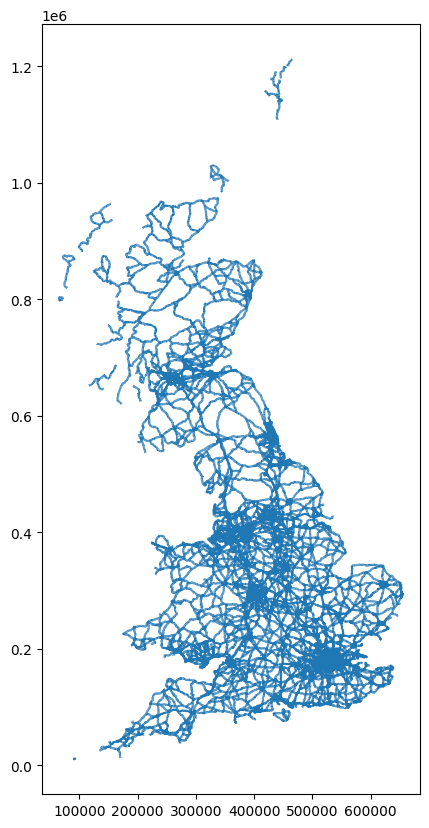

In [61]:
fig, ax = plt.subplots(figsize=(8, 10))

gdf_merged_lines.plot(ax=ax)

plt.show()

Save this to file:

In [64]:
gdf_merged_lines[['function', 'geometry']].to_file('major_roads.geojson')

This file is still 71MB. Way too big for streamlit!

Simplify it... somehow.

## Test: remove roads

Assume roads with longer names are less major and roads with a space or a '(' will be motorway spurs or toll roads.

Sanity check: do any of the road names contain spaces or punctuation?

In [71]:
mask = (
    (gdf_merged_lines.index.str.contains(' ')) |
    (gdf_merged_lines.index.str.contains('\('))
)

gdf_merged_lines[mask].index

Index(['A1(M)', 'A14(M)', 'A167(M)', 'A194(M)', 'A3(M)', 'A308(M)', 'A329(M)',
       'A38(M)', 'A404(M)', 'A48(M)', 'A57(M)', 'A58(M)', 'A627(M)', 'A64(M)',
       'A66(M)', 'A74(M)', 'A823(M)', 'M6 TOLL'],
      dtype='object', name='roadNumber')

In [72]:
roads_with_short_names = [r for r in gdf_merged_lines.index if len(r) < 4]

mask_short_names = (
    (gdf_merged_lines.index.isin(roads_with_short_names)) |
    (gdf_merged_lines.index.str.contains(' ')) |
    (gdf_merged_lines.index.str.contains('\('))
)

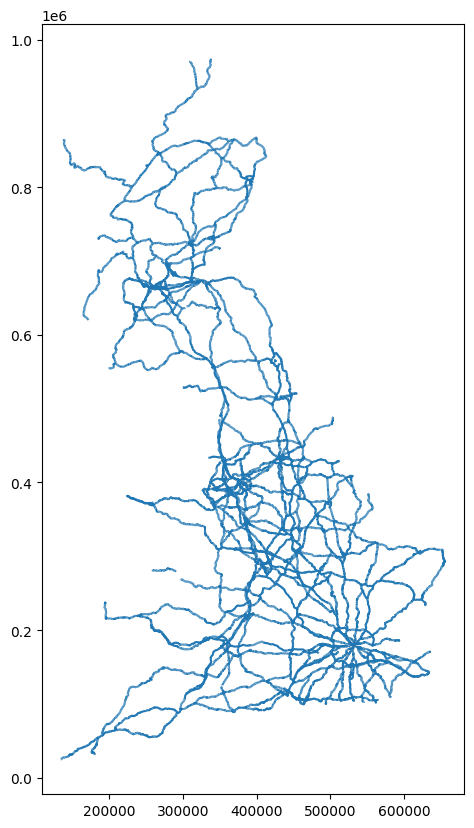

In [73]:
fig, ax = plt.subplots(figsize=(8, 10))

gdf_merged_lines[mask_short_names].plot(ax=ax)

plt.show()

This seems to have worked surprisingly well.

Save this to file:

In [74]:
gdf_merged_lines[mask_short_names][['function', 'geometry']].to_file('major_roads_with_short_names.geojson')

File size is now 22MB. Better but still too big.